<a href="https://colab.research.google.com/github/sudeepbhagat11/CNN-FASHION-MNIST-DATASET/blob/main/CNN_Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
num_classes = 10
epochs = 20

In [12]:
train_df = pd.read_csv('/content/fashion-mnist_test.csv',sep=',')
test_df = pd.read_csv('/content/fashion-mnist_train.csv',sep=',')

In [13]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
train_data = np.array(train_df,dtype='float32')
test_data = np.array(test_df,dtype='float32')

In [15]:
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test = test_data[:,1:]/255
y_test = test_data[:,0]

In [16]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size=0.2,random_state=42)

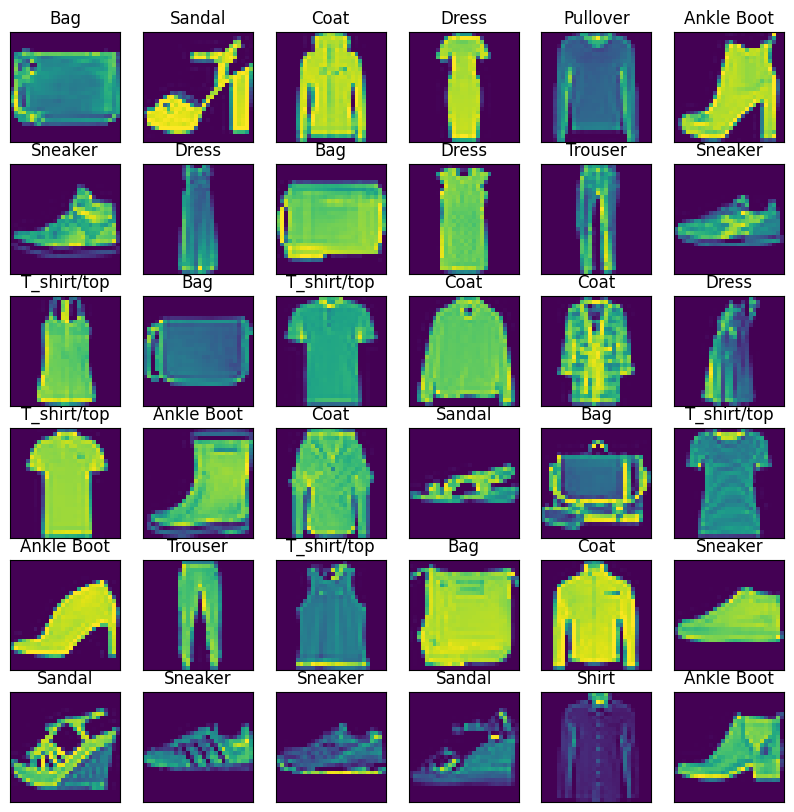

In [17]:
class_name = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_train[i].reshape((28,28)))
  label_index = int(y_train[i])
  plt.title(class_name[label_index])
plt.show()

In [18]:
image_rows=28
image_cols=28
batch_size=4096
image_shape=(image_rows,image_cols,1)

In [19]:
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_validate= x_validate.reshape(x_validate.shape[0],*image_shape)

In [20]:
# cnn_model = Sequential([
#     Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=image_shape),
#     MaxPooling2D(pool_size=2),
#     Dropout(0.2),
#     Flatten(),
#     Dense(32,activation='relu'),
#     Dense(10,activation='softmax')
# ])

cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))

cnn_model.add(Flatten())

# Each fully connected has half its input as its number of neurons.
cnn_model.add(Dense(250, activation='relu'))
cnn_model.add(Dense(125, activation='relu'))
cnn_model.add(Dense(60, activation='relu'))

# 10 neurons in the last layer as we have 10 classes.
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [21]:
cnn_model.compile(loss= 'sparse_categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])

In [22]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [23]:
history = cnn_model.fit(x_train,y_train,batch_size=4096,epochs=75,verbose=1,validation_data=(x_validate,y_validate))

Epoch 1/75
2/2 [==============================] - 14s 3s/step - loss: 2.3017 - accuracy: 0.1047 - val_loss: 2.2962 - val_accuracy: 0.1130
Epoch 2/75
2/2 [==============================] - 0s 91ms/step - loss: 2.2950 - accuracy: 0.1109 - val_loss: 2.2898 - val_accuracy: 0.1295
Epoch 3/75
2/2 [==============================] - 0s 89ms/step - loss: 2.2890 - accuracy: 0.1318 - val_loss: 2.2843 - val_accuracy: 0.1750
Epoch 4/75
2/2 [==============================] - 0s 89ms/step - loss: 2.2837 - accuracy: 0.1754 - val_loss: 2.2791 - val_accuracy: 0.2270
Epoch 5/75
2/2 [==============================] - 0s 82ms/step - loss: 2.2786 - accuracy: 0.2311 - val_loss: 2.2738 - val_accuracy: 0.2820
Epoch 6/75
2/2 [==============================] - 0s 96ms/step - loss: 2.2733 - accuracy: 0.2764 - val_loss: 2.2680 - val_accuracy: 0.3100
Epoch 7/75
2/2 [==============================] - 0s 89ms/step - loss: 2.2673 - accuracy: 0.3052 - val_loss: 2.2614 - val_accuracy: 0.3420
Epoch 8/75
2/2 [============

We can see in the loss curves below that our model overfits a bit before the validation loss stabilizes. Just so our model stays simple, and as the overfitting was not severe, we have opted for not adding dropout layers or any other countermeasures for overfitting.

Other than that, we have also chosen to let the validation loss converge instead of stopping the training once the training loss had left the validation loss behind.

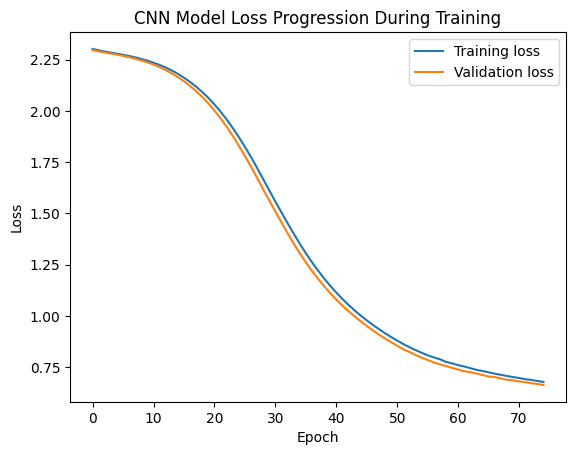

In [26]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("CNN Model Loss Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training loss", "Validation loss"])
plt.show()

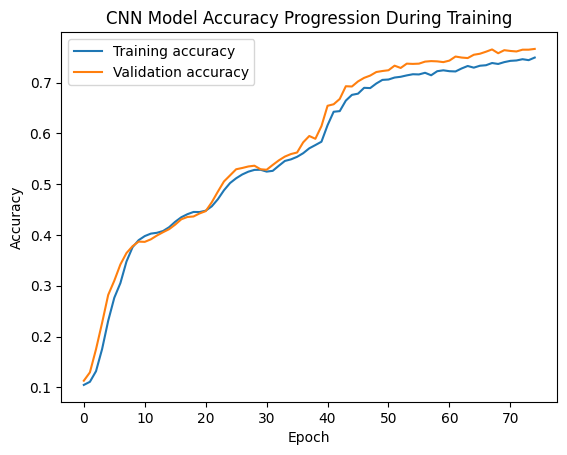

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("CNN Model Accuracy Progression During Training")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Training accuracy", "Validation accuracy"])
plt.show()

In [31]:
cnn_model.evaluate(x_validate, y_validate)


63/63 [==============================] - 0s 3ms/step - loss: 0.6643 - accuracy: 0.7665


[0.6643208861351013, 0.7664999961853027]

63/63 [==============================] - 0s 3ms/step


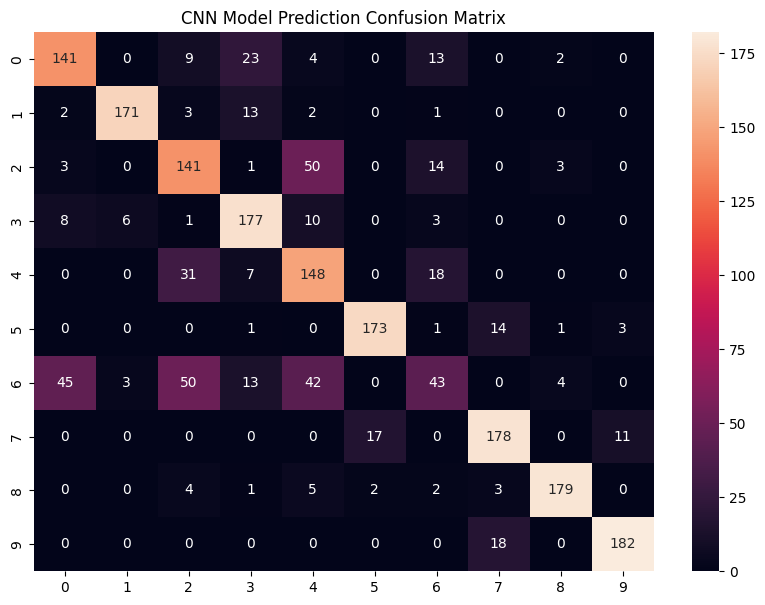

In [33]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = cnn_model.predict(x_validate)

# Get the class with highest predicted probability and assume it is the
# model prediction.
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_validate, y_pred_classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("CNN Model Prediction Confusion Matrix")
plt.show()

In [34]:

class_names = ["Class 0 => T-shirt",
               "Class 1 => Trouser",
               "Class 2 => Pullover",
               "Class 3 => Dress",
               "Class 4 => Coat",
               "Class 5 => Sandal",
               "Class 6 => Shirt",
               "Class 7 => Sneaker",
               "Class 8 => Bag",
               "Class 9 => Ankle boot"]
print(classification_report(y_validate, y_pred_classes, target_names=class_names))

                       precision    recall  f1-score   support

   Class 0 => T-shirt       0.71      0.73      0.72       192
   Class 1 => Trouser       0.95      0.89      0.92       192
  Class 2 => Pullover       0.59      0.67      0.63       212
     Class 3 => Dress       0.75      0.86      0.80       205
      Class 4 => Coat       0.57      0.73      0.64       204
    Class 5 => Sandal       0.90      0.90      0.90       193
     Class 6 => Shirt       0.45      0.21      0.29       200
   Class 7 => Sneaker       0.84      0.86      0.85       206
       Class 8 => Bag       0.95      0.91      0.93       196
Class 9 => Ankle boot       0.93      0.91      0.92       200

             accuracy                           0.77      2000
            macro avg       0.76      0.77      0.76      2000
         weighted avg       0.76      0.77      0.76      2000

